[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/huggingface/education-toolkit/blob/main/03_getting-started-with-transformers.ipynb)

💡 **Welcome!**

We’ve assembled a toolkit that university instructors and organizers can use to easily prepare labs, homework, or classes. The content is designed in a self-contained way such that it can easily be incorporated into the existing curriculum. This content is free and uses widely known Open Source technologies (`transformers`, `gradio`, etc).

Alternatively, you can request for someone on the Hugging Face team to run the tutorials for your class via the [ML demo.cratization tour](https://huggingface2.notion.site/ML-Demo-cratization-tour-with-66847a294abd4e9785e85663f5239652) initiative!

You can find all the tutorials and resources we’ve assembled [here](https://huggingface2.notion.site/Education-Toolkit-7b4a9a9d65ee4a6eb16178ec2a4f3599).

# Tutorial: Getting Started with Transformers

**Learning goals:** The goal of this tutorial is to learn how:

1. Transformer neural networks can be used to tackle a wide range of tasks in natural language processing and beyond.
3. Transfer learning allows one to adapt Transformers to specific tasks.
2. The `pipeline()` function from the `transformers` library can be used to run inference with models from the [Hugging Face Hub](https://huggingface.co/models).

This tutorial is based on the first of our O'Reilly book [_Natural Language Processing with Transformers_](https://transformersbook.com/) - check it out if you want to dive deeper into the topic!

**Duration**: 30-45 minutes

**Prerequisites:** Knowledge of Python and basic familiarity with machine learning


**Author**: [Lewis Tunstall](https://twitter.com/_lewtun) (feel free to ping me with any questions about this tutorial)

All of these steps can be done for free! All you need is an Internet browser and a place where you can write Python 👩‍💻

## 2. Text classification

Let's start with one of the most common tasks in NLP: text classification. We need a snippet of text for our models to analyze, so let's use the following (fictious!) customer feedback about a certain online order:

In [ ]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

While we're at it, let's create a simple wrapper so that we can pretty print out texts:

In [ ]:
import textwrap

wrapper = textwrap.TextWrapper(width=80, break_long_words=False, break_on_hyphens=False)
print(wrapper.fill(text))

Dear Amazon, last week I ordered an Optimus Prime action figure from your online
store in Germany. Unfortunately, when I opened the package, I discovered to my
horror that I had been sent an action figure of Megatron instead! As a lifelong
enemy of the Decepticons, I hope you can understand my dilemma. To resolve the
issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered.
Enclosed are copies of my records concerning this purchase. I expect to hear
from you soon. Sincerely, Bumblebee.


Now suppose that we'd like to predict the _sentiment_ of this text, i.e. whether the feedback is positive or negative. This is a special type of text classification that is often used in industry to aggregate customer feedback across products or services. The example below shows how a Transformer like BERT converts the inputs into atomic chunks called **tokens** which are then fed through the network to produce a single prediction:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/clf_arch.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=600>

To load a Transformer model for this task is quite simple. We just need to specify the task in the `pipeline()` function as follows;

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline('text-classification')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


When you run this code, you'll see a message about which Hub model is being used by default. In this case, the `pipeline()` function loads the `distilbert-base-uncased-finetuned-sst-2-english` model, which is a small BERT variant trained on [SST-2](https://paperswithcode.com/sota/sentiment-analysis-on-sst-2-binary) which is a sentiment analysis dataset.

💡 The first time you execute the code, the model will be automatically downloaded from the Hub and cached for later use!

Now we are ready to run our example through pipeline and look at some predictions:

In [ ]:
sentiment_pipeline(text)

[{'label': 'NEGATIVE', 'score': 0.9015459418296814}]

The model predicts negative sentiment with a high confidence which makes sense given that we have a disgruntled customer. You can also see that the pipeline returns a list of Python dictionaries with the predictions. We can also pass several texts at the same time in which case we would get several dicts in the list for each text one.

⚡ **Your turn!** Feed a list of texts with different types of sentiment to the `sentiment_pipeline` object. Do the predictions always make sense?

## 3. Named entity recognition

Let's now do something a little more sophisticated. Instead of just finding the overall sentiment, let's see if we can extract **entities** such as organizations, locations, or individuals from the text. This task is called named entity recognition, or NER for short. Instead of predicting just a class for the whole text **a class is predicted for each token**, as shown in the example below:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/ner_arch.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=600>

Again, we just load a pipeline for NER without specifying a model. This will load a default BERT model that has been trained on the [CoNLL-2003](https://huggingface.co/datasets/conll2003) dataset:

In [ ]:
ner_pipeline = pipeline('ner')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cuda:0


When we pass our text through the model,  we now get a long list of Python dictionaries, where each dictionary corresponds to one detected entity. Since multiple tokens can correspond to a a single entity ,we can apply an aggregation strategy that merges entities if the same class appears in consequtive tokens:

In [ ]:
entities = ner_pipeline(text, aggregation_strategy="simple")
print(entities)

[{'entity_group': 'ORG', 'score': 0.8790099, 'word': 'Amazon', 'start': 5, 'end': 11}, {'entity_group': 'MISC', 'score': 0.9908588, 'word': 'Optimus Prime', 'start': 36, 'end': 49}, {'entity_group': 'LOC', 'score': 0.9997547, 'word': 'Germany', 'start': 90, 'end': 97}, {'entity_group': 'MISC', 'score': 0.5565687, 'word': 'Mega', 'start': 208, 'end': 212}, {'entity_group': 'PER', 'score': 0.59025705, 'word': '##tron', 'start': 212, 'end': 216}, {'entity_group': 'ORG', 'score': 0.66969264, 'word': 'Decept', 'start': 253, 'end': 259}, {'entity_group': 'MISC', 'score': 0.49834898, 'word': '##icons', 'start': 259, 'end': 264}, {'entity_group': 'MISC', 'score': 0.7753613, 'word': 'Megatron', 'start': 350, 'end': 358}, {'entity_group': 'MISC', 'score': 0.98785394, 'word': 'Optimus Prime', 'start': 367, 'end': 380}, {'entity_group': 'PER', 'score': 0.8120963, 'word': 'Bumblebee', 'start': 502, 'end': 511}]


This isn't very easy to read, so let's clean up the outputs a bit:

In [ ]:
for entity in entities:
    print(f"{entity['word']}: {entity['entity_group']} ({entity['score']:.2f})")

Amazon: ORG (0.88)
Optimus Prime: MISC (0.99)
Germany: LOC (1.00)
Mega: MISC (0.56)
##tron: PER (0.59)
Decept: ORG (0.67)
##icons: MISC (0.50)
Megatron: MISC (0.78)
Optimus Prime: MISC (0.99)
Bumblebee: PER (0.81)


That's much better! It seems that the model found most of the named entities but was confused about "Megatron" andn "Decepticons", which are characters in the transformers franchise. This is no surprise since the original dataset probably did not contain many transformer characters. For this reason it makes sense to further fine-tune a model on your on dataset!

Now that we've seen an example of text and token classification using Transformers, let's look at an interesting application called **question answering**.

## 4. Question answering

In this task, the model is given a **question** and a **context** and needs to find the answer to the question within the context. This problem can be rephrased as a classification problem: For each token the model needs to predict whether it is the start or the end of the answer. In the end we can extract the answer by looking at the span between the token with the highest start probability and highest end probability:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/qa_arch.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=600>

You can imagine that this requires quite a bit of pre- and post-processing logic. Good thing that the pipeline takes care of all that! As usual, we load the model by specifying the task in the `pipeline()` function:

In [ ]:
qa_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda:0


This default model is trained on the famous [SQuAD dataset](https://huggingface.co/datasets/squad). Let's see if we can ask it what the customer wants:

In [ ]:
question = "Is the review postive or negative?"

outputs = qa_pipeline(question=question, context=text)
outputs

{'score': 0.017848752439022064,
 'start': 399,
 'end': 457,
 'answer': 'Enclosed are copies of my records concerning this purchase'}

Awesome, that sounds about right!

## 5. Text summarization

Let's see if we can go beyond these natural language understanding tasks (NLU) where BERT excels and delve into the generative domain. Note that generation is much more computationally demanding since we usually generate one token at a time and need to run this several times. An example for how this process works is shown below:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/gen_steps.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=600>

A popular task involving generation is summarization. Let's see if we can use a transformer to generate a summary for us:

In [ ]:
summarization_pipeline = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


This model is trained was trained on the [CNN/Dailymail dataset](https://huggingface.co/datasets/cnn_dailymail) to summarize news articles.

In [ ]:
outputs = summarization_pipeline(text, max_length=45, clean_up_tokenization_spaces=True)
print(wrapper.fill(outputs[0]['summary_text']))

Your min_length=56 must be inferior than your max_length=45.
/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (45). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 Bumblebee ordered an Optimus Prime action figure from your online store in
Germany. Unfortunately, when I opened the package, I discovered to my horror
that I had been sent an action figure of Megatron instead.


That's not too bad! We can see the model was able to get the main gist of the customer feedback and even identified the author as "Bumblebee".

## 6. Translation

But what if there is no model in the language of my data? You can still try to translate the text. The [Helsinki NLP team](https://huggingface.co/models?pipeline_tag=translation&sort=downloads&search=Helsinkie-NLP) has provided over 1,000 language pair models for translation 🤯. Here we load one that translates English to German:

In [ ]:
translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/298M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


Let's translate the our text to German:

In [ ]:
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(wrapper.fill(outputs[0]['translation_text']))

Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus
Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete,
entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von
Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich
hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere
einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt.
Eingeschlossen sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte,
von Ihnen bald zu hören. Aufrichtig, Bumblebee.


We can see that the text is clearly not perfectly translated, but the core meaning stays the same. Another cool application of translation models is data augmentation via backtranslation!

## 7. Zero-shot classification

As a last example let's have a look at a cool application showing the versatility of transformers: zero-shot classification. In zero-shot classification the model receives a text and a list of candidate labels and determines which labels are compatible with the text. Instead of having fixed classes this allows for flexible classification without any labelled data! Usually this is a good first baseline!

In [ ]:
zero_shot_classifier = pipeline("zero-shot-classification",
                                model="vicgalle/xlm-roberta-large-xnli-anli")

Downloading:   0%|          | 0.00/734 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.09G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Let's have a look at an example:

In [ ]:
text = 'Dieser Tutorial ist großartig! Ich hoffe, dass jemand von Hugging Face meine Universität besuchen wird :)'
classes = ['Treffen', 'Arbeit', 'Digital', 'Reisen']

In [ ]:
zero_shot_classifier(text, classes, multi_label=True)

{'labels': ['Digital', 'Treffen', 'Arbeit', 'Reisen'],
 'scores': [0.7863982915878296,
  0.5954463481903076,
  0.4407258629798889,
  0.0017183449817821383],
 'sequence': 'Dieser Tutorial ist großartig! Ich hoffe, dass jemand von Hugging Face meine Universität besuchen wird :)'}

This seems to have worked really well on this short example. Naturally, for longer and more domain specific examples this approach might suffer.

## 8. Going beyond text

As mentioned at the start of this tutorial, Transformers can also be used for domains other than NLP! For these domains, there are many more pipelines that you can experiment with. Look at the following list for an overview:

In [ ]:
from transformers import pipelines
for task in pipelines.SUPPORTED_TASKS:
    print(task)

audio-classification
automatic-speech-recognition
feature-extraction
text-classification
token-classification
question-answering
table-question-answering
fill-mask
summarization
translation
text2text-generation
text-generation
zero-shot-classification
conversational
image-classification
image-segmentation
object-detection


Let's have a look at an application involving images!

### Computer vision

Recently, transformer models have also entered computer vision. Check out the DETR model on the [Hub](https://huggingface.co/facebook/detr-resnet-101-dc5):

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/object_detection.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=400>

### Audio

Another promising area is audio processing. Especially Speech2Text there have been some promising advancements recently. See for example the [wav2vec2 model](https://huggingface.co/facebook/wav2vec2-base-960h):

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/speech2text.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=400>

### Table QA

Finally, a lot of real world data is still in form of tables. Being able to query tables is very useful and with [TAPAS](https://huggingface.co/google/tapas-large-finetuned-wtq) you can do tabular question-answering:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/tapas.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=400>

## 9. Where to next?

Hopefully this tutorial has given you a taste of what Transformers can do and you're now excited to learn more! Here's a few resources you can use to dive deeper into the topic and the Hugging Face ecosystem:

🤗 **A Tour through the Hugging Face Hub**

In this tutorial, you get to:
- Explore the over 30,000 models shared in the Hub.
- Learn efficient ways to find the right model and datasets for your own task.
- Learn how to contribute and work collaboratively in your ML workflows

***Duration: 20-40 minutes***

👉 [click here to access the tutorial](https://www.notion.so/Workshop-A-Tour-through-the-Hugging-Face-Hub-2098e4bae9ba4288857e85c87ff1c851)

✨ **Build and Host Machine Learning Demos with Gradio & Hugging Face**

In this tutorial, you get to:
- Explore ML demos created by the community.
- Build a quick demo for your machine learning model in Python using the `gradio` library
- Host the demos for free with Hugging Face Spaces
- Add your demo to the Hugging Face org for your class or conference

***Duration: 20-40 minutes***

👉 [click here to access the tutorial](https://colab.research.google.com/github.com/huggingface/education-toolkit/tree/main/02_ml-demos-with-gradio.ipynb)

🎓 **The Hugging Face Course**

This course teaches you about applying Transformers to various tasks in natural language processing and beyond. Along the way, you'll learn how to use the Hugging Face ecosystem — 🤗 Transformers, 🤗 Datasets, 🤗 Tokenizers, and 🤗 Accelerate — as well as the Hugging Face Hub. It's completely free too!

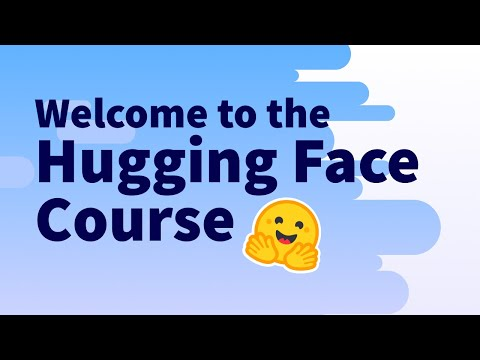

In [ ]:
YouTubeVideo('00GKzGyWFEs')